# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

## Read the dataset given in file named 'bigcity.csv'.

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('bigcity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# Q1. Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [2]:
data.isna().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

In [3]:
data.drop('Unnamed: 0',axis=1).corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# Q2. Transform the dataset and Split data into train, test sets 

Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Hint: You can shape function to get the size of the dataframe

Hint: You can use df.loc or df.iloc to separate input and target and store into X and Y

Hint: You can use train_test_split function to split data to X_train, X_test, y_train, y_test 

In [4]:
data.shape

(49, 3)

In [5]:
X = data.drop(['Unnamed: 0', 'x'],axis=1)

In [6]:
y = data.drop(['Unnamed: 0', 'u'],axis=1)

In [7]:
X.head()

,u
0,138
1,93
2,61
3,179
4,48


In [8]:
y.head()

,x
0,143
1,104
2,69
3,260
4,75


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [11]:
X_train.head()

,u
31,36
45,43
33,67
18,381
17,76


In [12]:
y_train.head()

,x
31,46
45,61
33,67
18,464
17,80


# Q3. Fit Linear Regression Model and find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Hint: coef_ and intercept_ functions can help you get coefficients & intercept

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [15]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Q4. Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

Hint - use matplotlib plt.plot() function to plot the line

In [16]:
#for idx, col_name in enumerate(X_train.columns):
    #print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
print("The coefficient for {} is {}".format('u', regression_model.coef_[0][0]))

The coefficient for u is 1.130109648109167


In [17]:
print("The intercept for our model is {}".format(regression_model.intercept_[0]))

The intercept for our model is 11.277745820816207


In [18]:
y_pred_train = 1.130109648109167 * X_train +  11.277745820816207

In [19]:
#y_pred_train

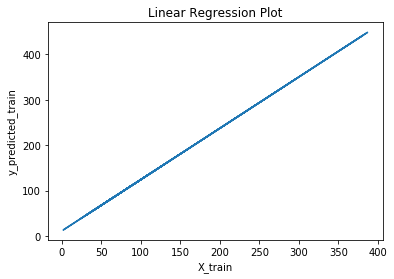

In [20]:
plt.plot(X_train, y_pred_train)
plt.xlabel('X_train')
plt.ylabel('y_predicted_train')
plt.title('Linear Regression Plot')
plt.show()

# Q5. Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [21]:
#y_pred = lm.predict(X_test)
y_pred = regression_model.predict(X_test)
y_pred

array([[ 39.53048702],
       [ 94.90585978],
       [584.24333741],
       [164.97265796],
       [ 63.26278963],
       [300.58581574],
       [116.37794309],
       [ 99.42629837],
       [ 54.22191245],
       [205.6566053 ]])

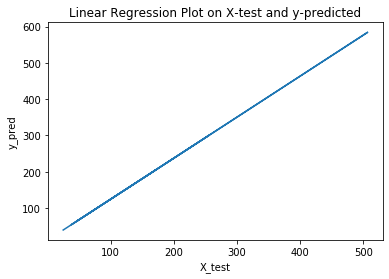

In [22]:
plt.plot(X_test, y_pred)
plt.xlabel('X_test')
plt.ylabel('y_pred')
plt.title('Linear Regression Plot on X-test and y-predicted')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#mse = __________________________
mse = mean_squared_error(y_test, y_pred)

#rmse = sqrt(mse)
rms = np.sqrt(mse)

#r2Score = ________________________
r2Score = r2_score(y_test, y_pred)


print("\nThe Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))


The Root Mean Sq Error is 20.821207849503107 and R^2 error is 0.984648896095209


### Calculate the accuracy of the model for both training and test data set 

Hint: .score() function 

In [24]:
regression_model.score(X_train, y_train)

0.9467574390909765

In [25]:
regression_model.score(X_test, y_test)

0.9846488960952091

# Decision Trees and Ensembles

#### Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [26]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame and Print 10 samples from the dataset


Load file 'diabetes.csv' from a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [28]:
pima_df = pd.read_csv("diabetes.csv")

In [29]:
pima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
279,2,108,62,10,278,25.3,0.881,22,0
29,5,117,92,0,0,34.1,0.337,38,0
228,4,197,70,39,744,36.7,2.329,31,0
548,1,164,82,43,67,32.8,0.341,50,0
33,6,92,92,0,0,19.9,0.188,28,0
659,3,80,82,31,70,34.2,1.292,27,1
278,5,114,74,0,0,24.9,0.744,57,0
225,1,87,78,27,32,34.6,0.101,22,0
30,5,109,75,26,0,36.0,0.546,60,0
721,1,114,66,36,200,38.1,0.289,21,0


# Q2. Print the datatypes of each column and the shape of the dataset 

In [30]:
pima_df.shape

(768, 9)

In [31]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [33]:
(pima_df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Q3. Replace all the 0s in the column with the median of the same column value accordingly.

In [34]:
pima_df.median()
#pima_df['Glucose'].median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [35]:
for colname in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    #print(pima_df[colname].median())
    pima_df[colname].replace(0, pima_df[colname].median(), inplace=True)

In [36]:
(pima_df==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Q4. Print the descriptive statistics of each & every column using describe() function

In [37]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q5. See the distribution of 'Outcome' variable and countplot using seaborn

In [38]:
pima_df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


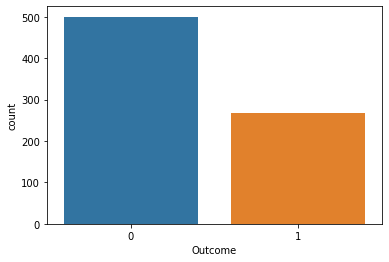

In [39]:
sns.countplot('Outcome', data=pima_df)

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


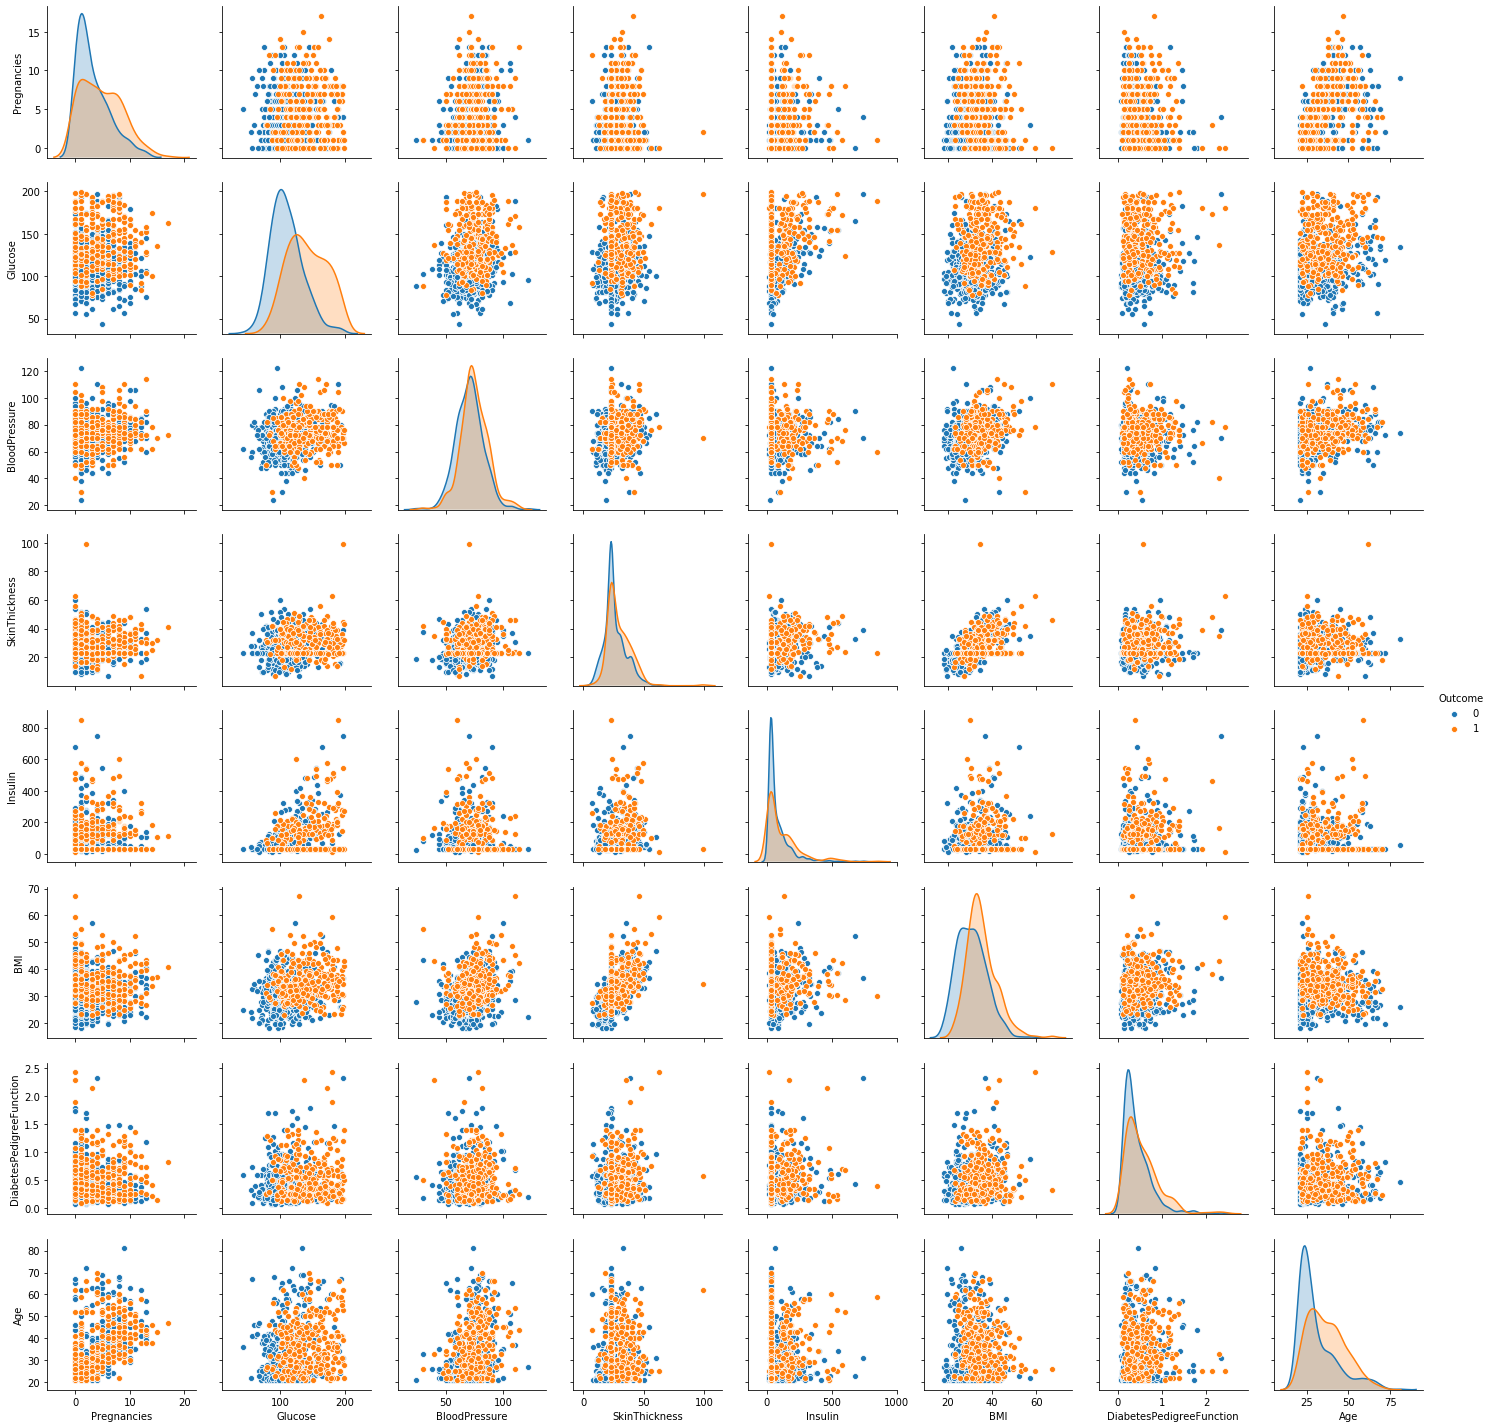

In [40]:
a = sns.pairplot(data=pima_df, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                                 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')

In [41]:
print("Observation from pairplot")
print("==========================")
print("Kurtosis is more in KDE plots for class 0 except in case of Blood Pressure and BMI.")
print("KDE plots show that plots for class 0 and class 1 are ovelapping which means that the data is not easily classifiable.")
print("KDE plot for BloodPressure is slightly normally distributed.All other plots are mostly right skewed.")
print("scatter plots for BMI vs SkinThickness show that these features are linearly correlated.")
print("All other scatter plots do not show any linear relation between the features")

Observation from pairplot
Kurtosis is more in KDE plots for class 0 except in case of Blood Pressure and BMI.
KDE plots show that plots for class 0 and class 1 are ovelapping which means that the data is not easily classifiable.
KDE plot for BloodPressure is slightly normally distributed.All other plots are mostly right skewed.
scatter plots for BMI vs SkinThickness show that these features are linearly correlated.
All other scatter plots do not show any linear relation between the features


In [42]:
corr = pima_df.drop('Outcome', axis=1).corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000


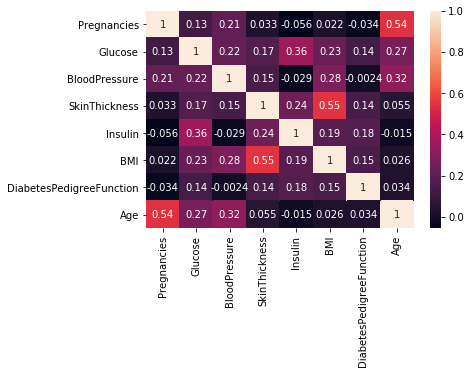

In [43]:
a = sns.heatmap(corr, annot=True)

Using the plot - infer the relationship between different variables

In [44]:
print("Observation from Correlation matrix and Heatmap")
print("===============================================")
print("The features BMI and SkinThickness are most correlaated with correlation value of 0.55")
print("The features Age and Pregnancies are correlaated with correlation value of 0.54")

Observation from Correlation matrix and Heatmap
The features BMI and SkinThickness are most correlaated with correlation value of 0.55
The features Age and Pregnancies are correlaated with correlation value of 0.54


# Q7. Divide the data into feature(X) and target(Y) sets and split the pima_df into training and test set in the ratio of 70:30 (Training:Test).


In [45]:
X = pima_df.drop('Outcome', axis=1)
y = pima_df['Outcome']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


# Q8. Create the decision tree model using “entropy” as the cost and fit it to training data.</b>



In [48]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_pred = dt.predict(X_test)

In [50]:
y_pred_1 = dt.predict(X_train)

# Q9. Print the accuracy of the model & print the confusion matrix 

In [51]:
dt.score(X_train, y_train)

1.0

In [52]:
accuracy_score(y_train, y_pred_1)

1.0

In [53]:
dt.score(X_test,y_test)

0.7012987012987013

In [54]:
accuracy_score(y_test, y_pred)

0.7012987012987013

In [55]:
confusion_matrix(y_test, y_pred)

array([[112,  35],
       [ 34,  50]], dtype=int64)

In [56]:
sum(y_test)

84

In [57]:
sum(y_pred)

85

Print the feature importance of the decision model - Optional

In [58]:
pd.DataFrame(dt.feature_importances_, index = X.columns, columns=['Feature Importance'])

,Feature Importance
Pregnancies,0.063517
Glucose,0.292272
BloodPressure,0.056127
SkinThickness,0.057797
Insulin,0.061817
BMI,0.193123
DiabetesPedigreeFunction,0.145949
Age,0.129398


# Q10. Apply the Random forest model and print the accuracy of Random forest Model

In [59]:
RF = RandomForestClassifier(n_estimators = 100, criterion='gini', bootstrap=True, random_state=7)

In [60]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [61]:
y_pred = RF.predict(X_test)

In [62]:
RF.score(X_train, y_train)

1.0

In [63]:
RF.score(X_test, y_test)

0.7575757575757576

In [64]:
accuracy_score(y_test, y_pred)

0.7575757575757576

In [65]:
confusion_matrix(y_test, y_pred)

array([[122,  25],
       [ 31,  53]], dtype=int64)

In [66]:
sum(y_test)

84

In [67]:
sum(y_pred)

78

In [68]:
pd.DataFrame(RF.feature_importances_, index = X.columns, columns=['Feature Importance'])

,Feature Importance
Pregnancies,0.076392
Glucose,0.253947
BloodPressure,0.087744
SkinThickness,0.080991
Insulin,0.070995
BMI,0.162152
DiabetesPedigreeFunction,0.124292
Age,0.143486


# -------------------------------------------------------------------
# Next steps are optional and will not be graded.
# -------------------------------------------------------------------

# Q11. Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
#Using algorithm 'SAMME' based on Exponential loss function
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100, 
                             algorithm='SAMME', 
                             learning_rate=1.0, random_state=7)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [71]:
y_pred = ada_clf.predict(X_test)

In [73]:
ada_clf.score(X_train, y_train)

0.8175046554934823

In [74]:
ada_clf.score(X_test, y_test)

0.7662337662337663

In [75]:
accuracy_score(y_test, y_pred)

0.7662337662337663

In [76]:
confusion_matrix(y_test, y_pred)

array([[121,  26],
       [ 28,  56]], dtype=int64)

In [77]:
#Using algorithm 'SAMME.R' based on Class probabilities
ada_clf_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=100, 
                             algorithm='SAMME.R', 
                             learning_rate=1.0, random_state=7)

ada_clf_2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [78]:
y_pred_2 = ada_clf_2.predict(X_test)

In [79]:
ada_clf_2.score(X_train, y_train)

0.8864059590316573

In [80]:
ada_clf_2.score(X_test, y_test)

0.7359307359307359

In [81]:
accuracy_score(y_test, y_pred_2)

0.7359307359307359

In [82]:
confusion_matrix(y_test, y_pred_2)

array([[114,  33],
       [ 28,  56]], dtype=int64)

# Q12. Apply Bagging Classifier Algorithm and print the accuracy.

In [83]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators = 100,
                            bootstrap = True,
                            max_samples = 0.7,
                            n_jobs = -1,
                            oob_score = True, random_state=7)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [84]:
y_pred = bag_clf.predict(X_test)

In [85]:
bag_clf.score(X_train, y_train)

0.9906890130353817

In [86]:
bag_clf.score(X_test, y_test)

0.7705627705627706

In [87]:
accuracy_score(y_test, y_pred)

0.7705627705627706

In [88]:
confusion_matrix(y_test, y_pred)

array([[120,  27],
       [ 26,  58]], dtype=int64)

# Q13. - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [89]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, random_state=7)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
y_predict = gbc.predict(X_test)

In [91]:
gbc.score(X_train, y_train)

0.9273743016759777

In [92]:
gbc.score(X_test, y_test)

0.7575757575757576

In [93]:
accuracy_score(y_test, y_pred)

0.7705627705627706

In [94]:
confusion_matrix(y_test, y_pred)

array([[120,  27],
       [ 26,  58]], dtype=int64)

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

# Q14. Apply Voting Classfier on the given dataset 

In [95]:
VC = VotingClassifier(estimators=[('DecisionTree', dt), ('RandomForest', RF), 
                                               ('ADABoost', ada_clf), ('Bagging', bag_clf), ('GradientBoost', gbc)],
                                   voting='soft')
VC.fit(X_train, y_train)

VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='entropy',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='be

In [96]:
y_pred = VC.predict(X_test)

In [97]:
VC.score(X_train, y_train)

1.0

In [98]:
VC.score(X_test, y_test)

0.7792207792207793

In [99]:
accuracy_score(y_test, y_pred)

0.7792207792207793

In [100]:
confusion_matrix(y_test, y_pred)

array([[121,  26],
       [ 25,  59]], dtype=int64)

# Q15. State your insights.

In [108]:
print("Model performance of different Classification methods")
print("=====================================================")
dict ={'DecisionTreeClassifier' : dt.score(X_test, y_test),
      'RandomForestClassifier' : RF.score(X_test, y_test),
      'ADABoostClassifier' : ada_clf.score(X_test, y_test),
      'BaggingClassifier' : bag_clf.score(X_test, y_test),
      'GradientBoostingClassifier' : gbc.score(X_test, y_test),
      'VotingClassifier' : VC.score(X_test, y_test)}
pd.DataFrame(data=dict.values(), index=dict.keys(), columns = ['Model Performance'])

Model performance of different Classification methods


,Model Performance
DecisionTreeClassifier,0.701299
RandomForestClassifier,0.757576
ADABoostClassifier,0.766234
BaggingClassifier,0.770563
GradientBoostingClassifier,0.757576
VotingClassifier,0.779221


In [109]:
print("Bagging Classifier and Voting Clasifier are giving a high model accuracy of 77%")

Bagging Classifier and Voting Clasifier are giving a high model accuracy of 77%
